# Explore wavelets

Stefan/Yuzhao Heng
Since Sun. Sep. 26th, 2021

Explore usage of `pywt`, to see how wavelet decomposition into levels of coefficients works.


## Setup

In [1]:
from math import isclose

import numpy as np
import pywt

from icecream import ic

from util import *



## `Wavelet` objects

In [2]:
w = pywt.Wavelet('sym5')
print(w)
ic(w.dec_len, w.rec_len)
scl_fun, wvl_fun, x = w.wavefun()
ic(scl_fun.shape, wvl_fun.shape, x.shape)
assert isclose(scl_fun @ wvl_fun, 0, abs_tol=1e-9)  # Orthogonal

w = pywt.Wavelet('db5')
print(w)

Wavelet sym5
  Family name:    Symlets
  Short name:     sym
  Filters length: 10
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       near symmetric
  DWT:            True
  CWT:            False


ic| w.dec_len: 10, w.rec_len: 10
ic| scl_fun.shape: (2305,), wvl_fun.shape: (2305,), x.shape: (2305,)


Wavelet db5
  Family name:    Daubechies
  Short name:     db
  Filters length: 10
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


## All wavelets available

In [3]:
for f in pywt.families():
    l = pywt.wavelist(f)
    ic(len(l), l[:8])


ic| len(l): 1, l[:8]: ['haar']
ic| len(l): 38
    l[:8]: ['db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8']
ic| len(l): 19
    l[:8]: ['sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9']
ic| len(l): 17
    l[:8]: ['coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8']
ic| len(l): 15
    l[:8]: ['bior1.1',
            'bior1.3',
            'bior1.5',
            'bior2.2',
            'bior2.4',
            'bior2.6',
            'bior2.8',
            'bior3.1']
ic| len(l): 15
    l[:8]: ['rbio1.1',
            'rbio1.3',
            'rbio1.5',
            'rbio2.2',
            'rbio2.4',
            'rbio2.6',
            'rbio2.8',
            'rbio3.1']
ic| len(l): 1, l[:8]: ['dmey']
ic| len(l): 8
    l[:8]: ['gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8']
ic| len(l): 1, l[:8]: ['mexh']
ic| len(l): 1, l[:8]: ['morl']
ic| len(l): 8
    l[:8]: ['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8']
ic| len(l

## Wavelet shapes

ic| f: 'haar'


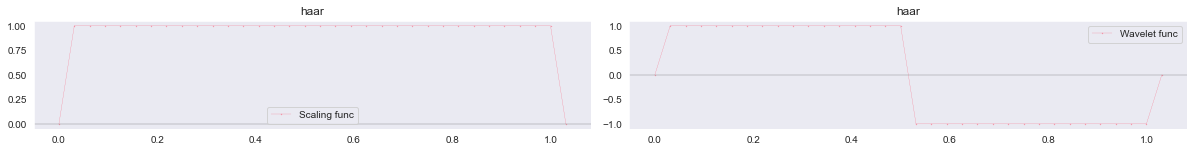

ic| f: 'db'


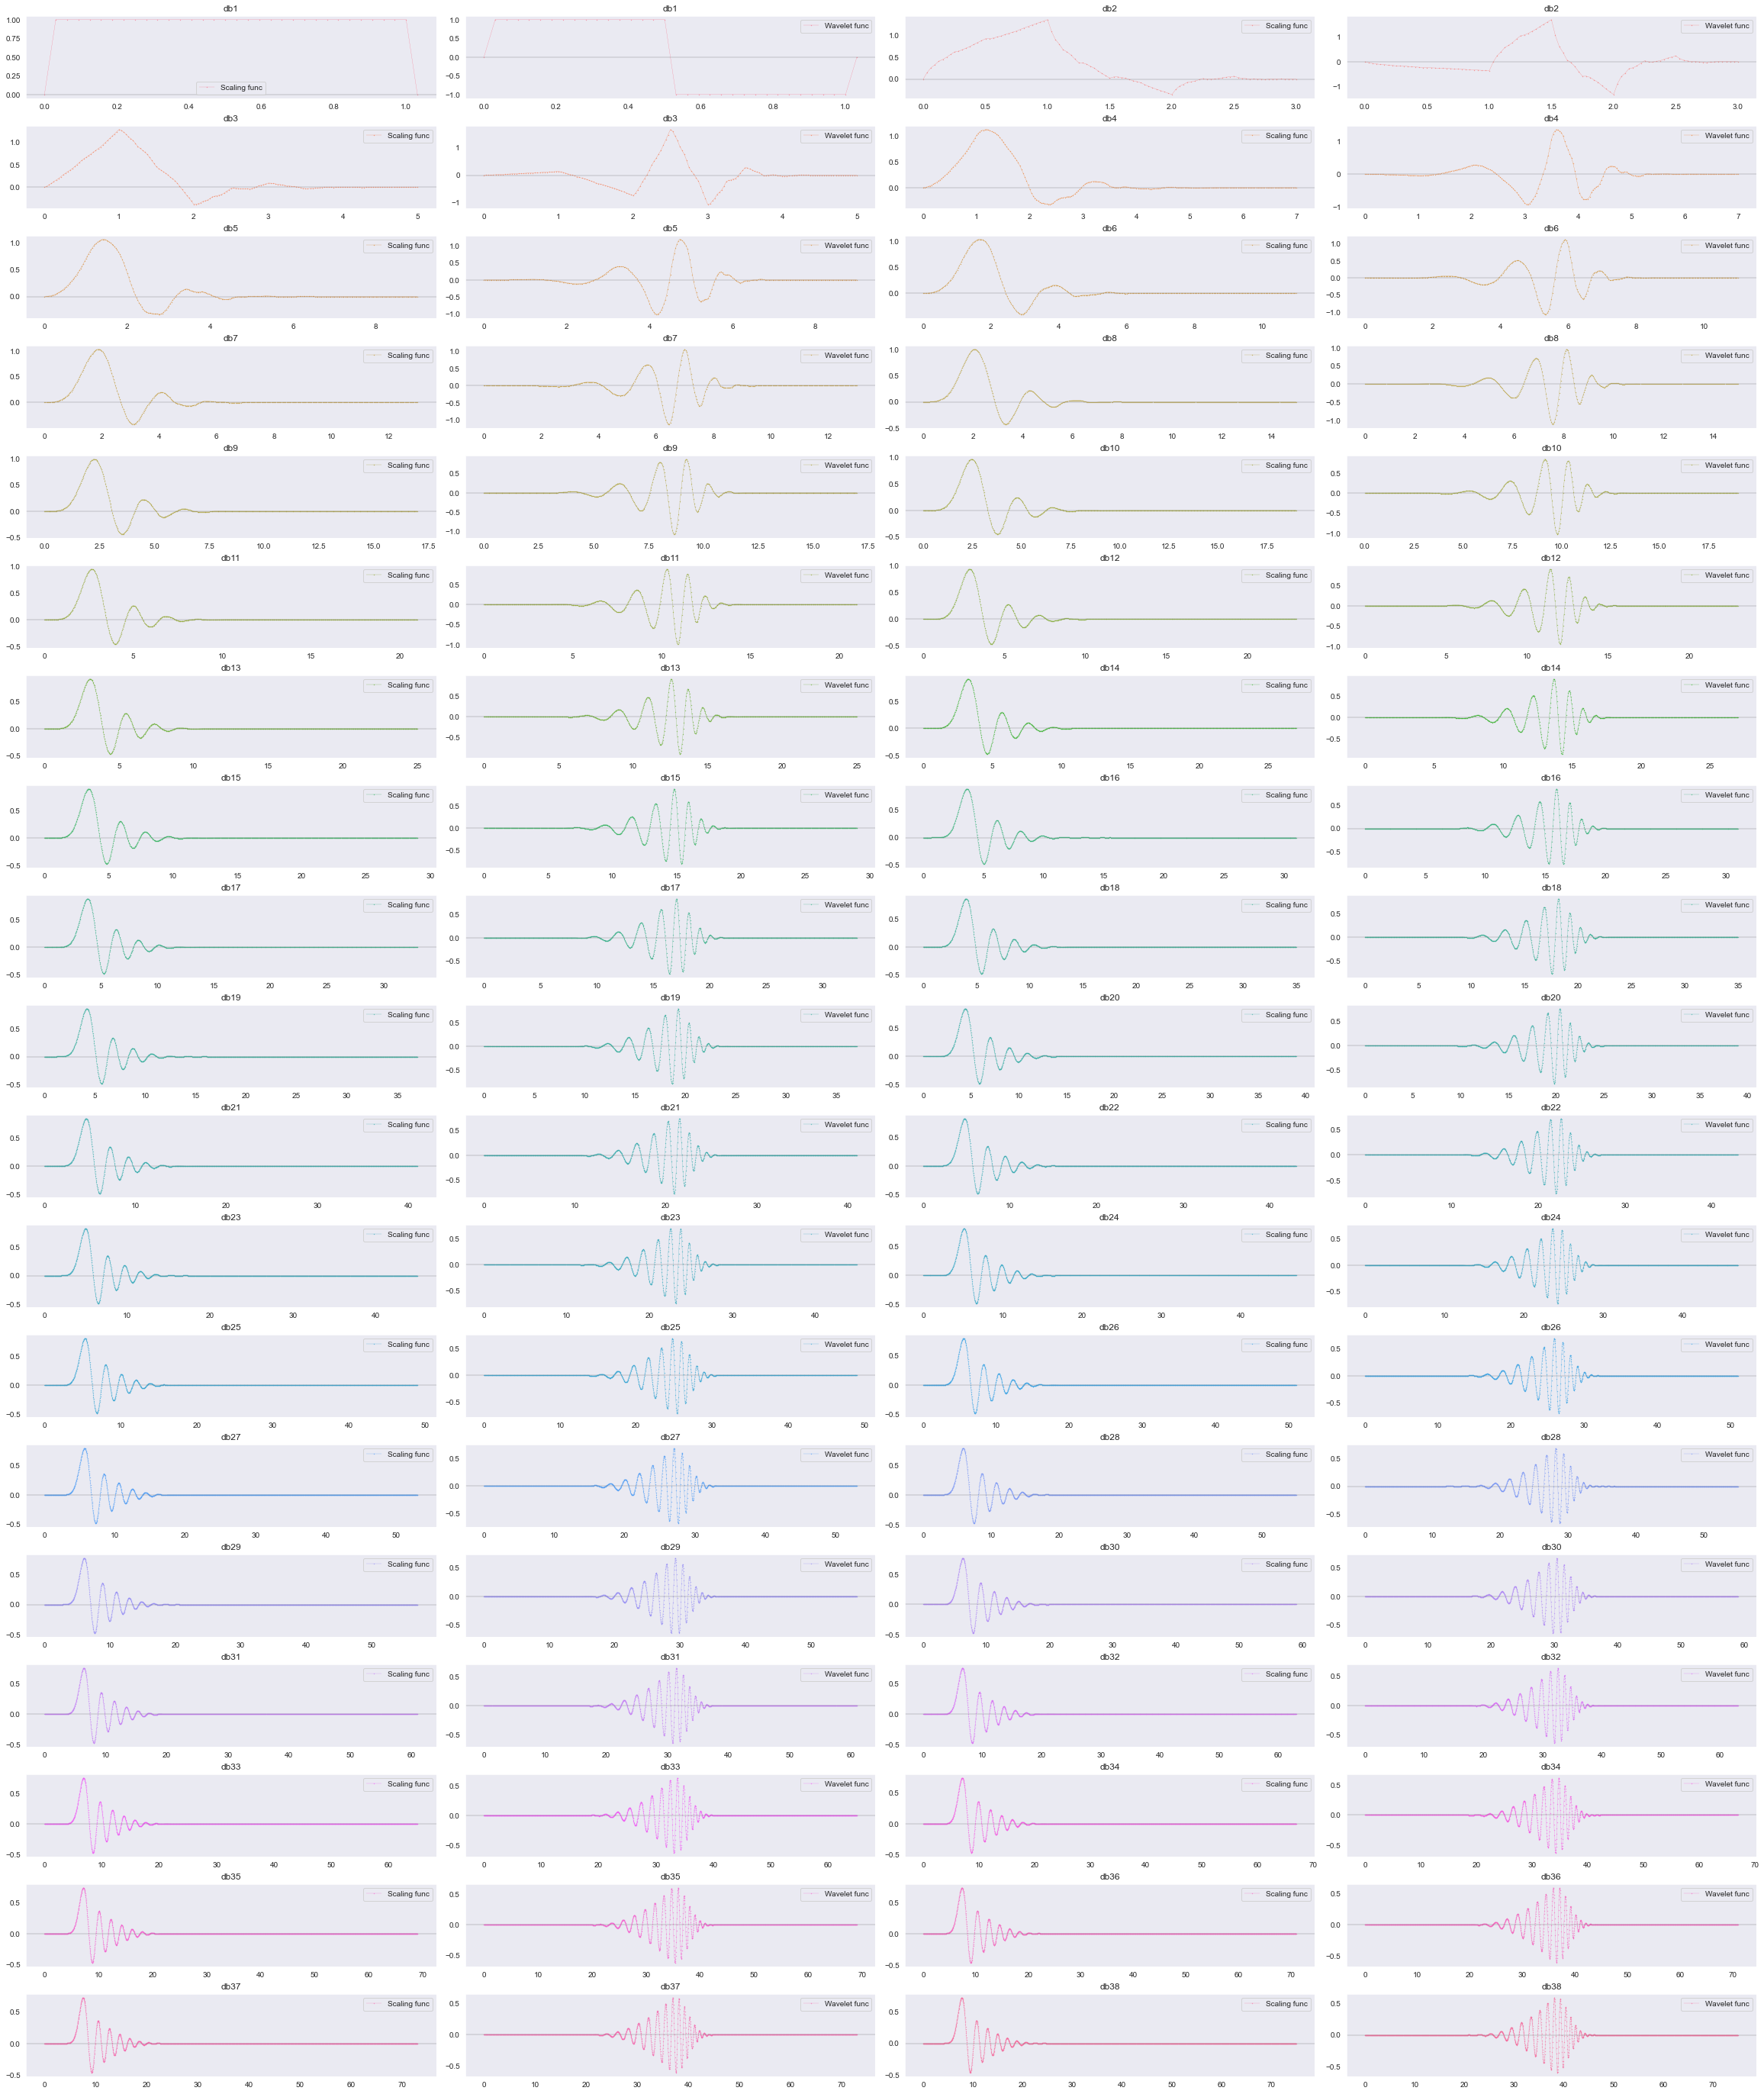

ic| f: 'sym'


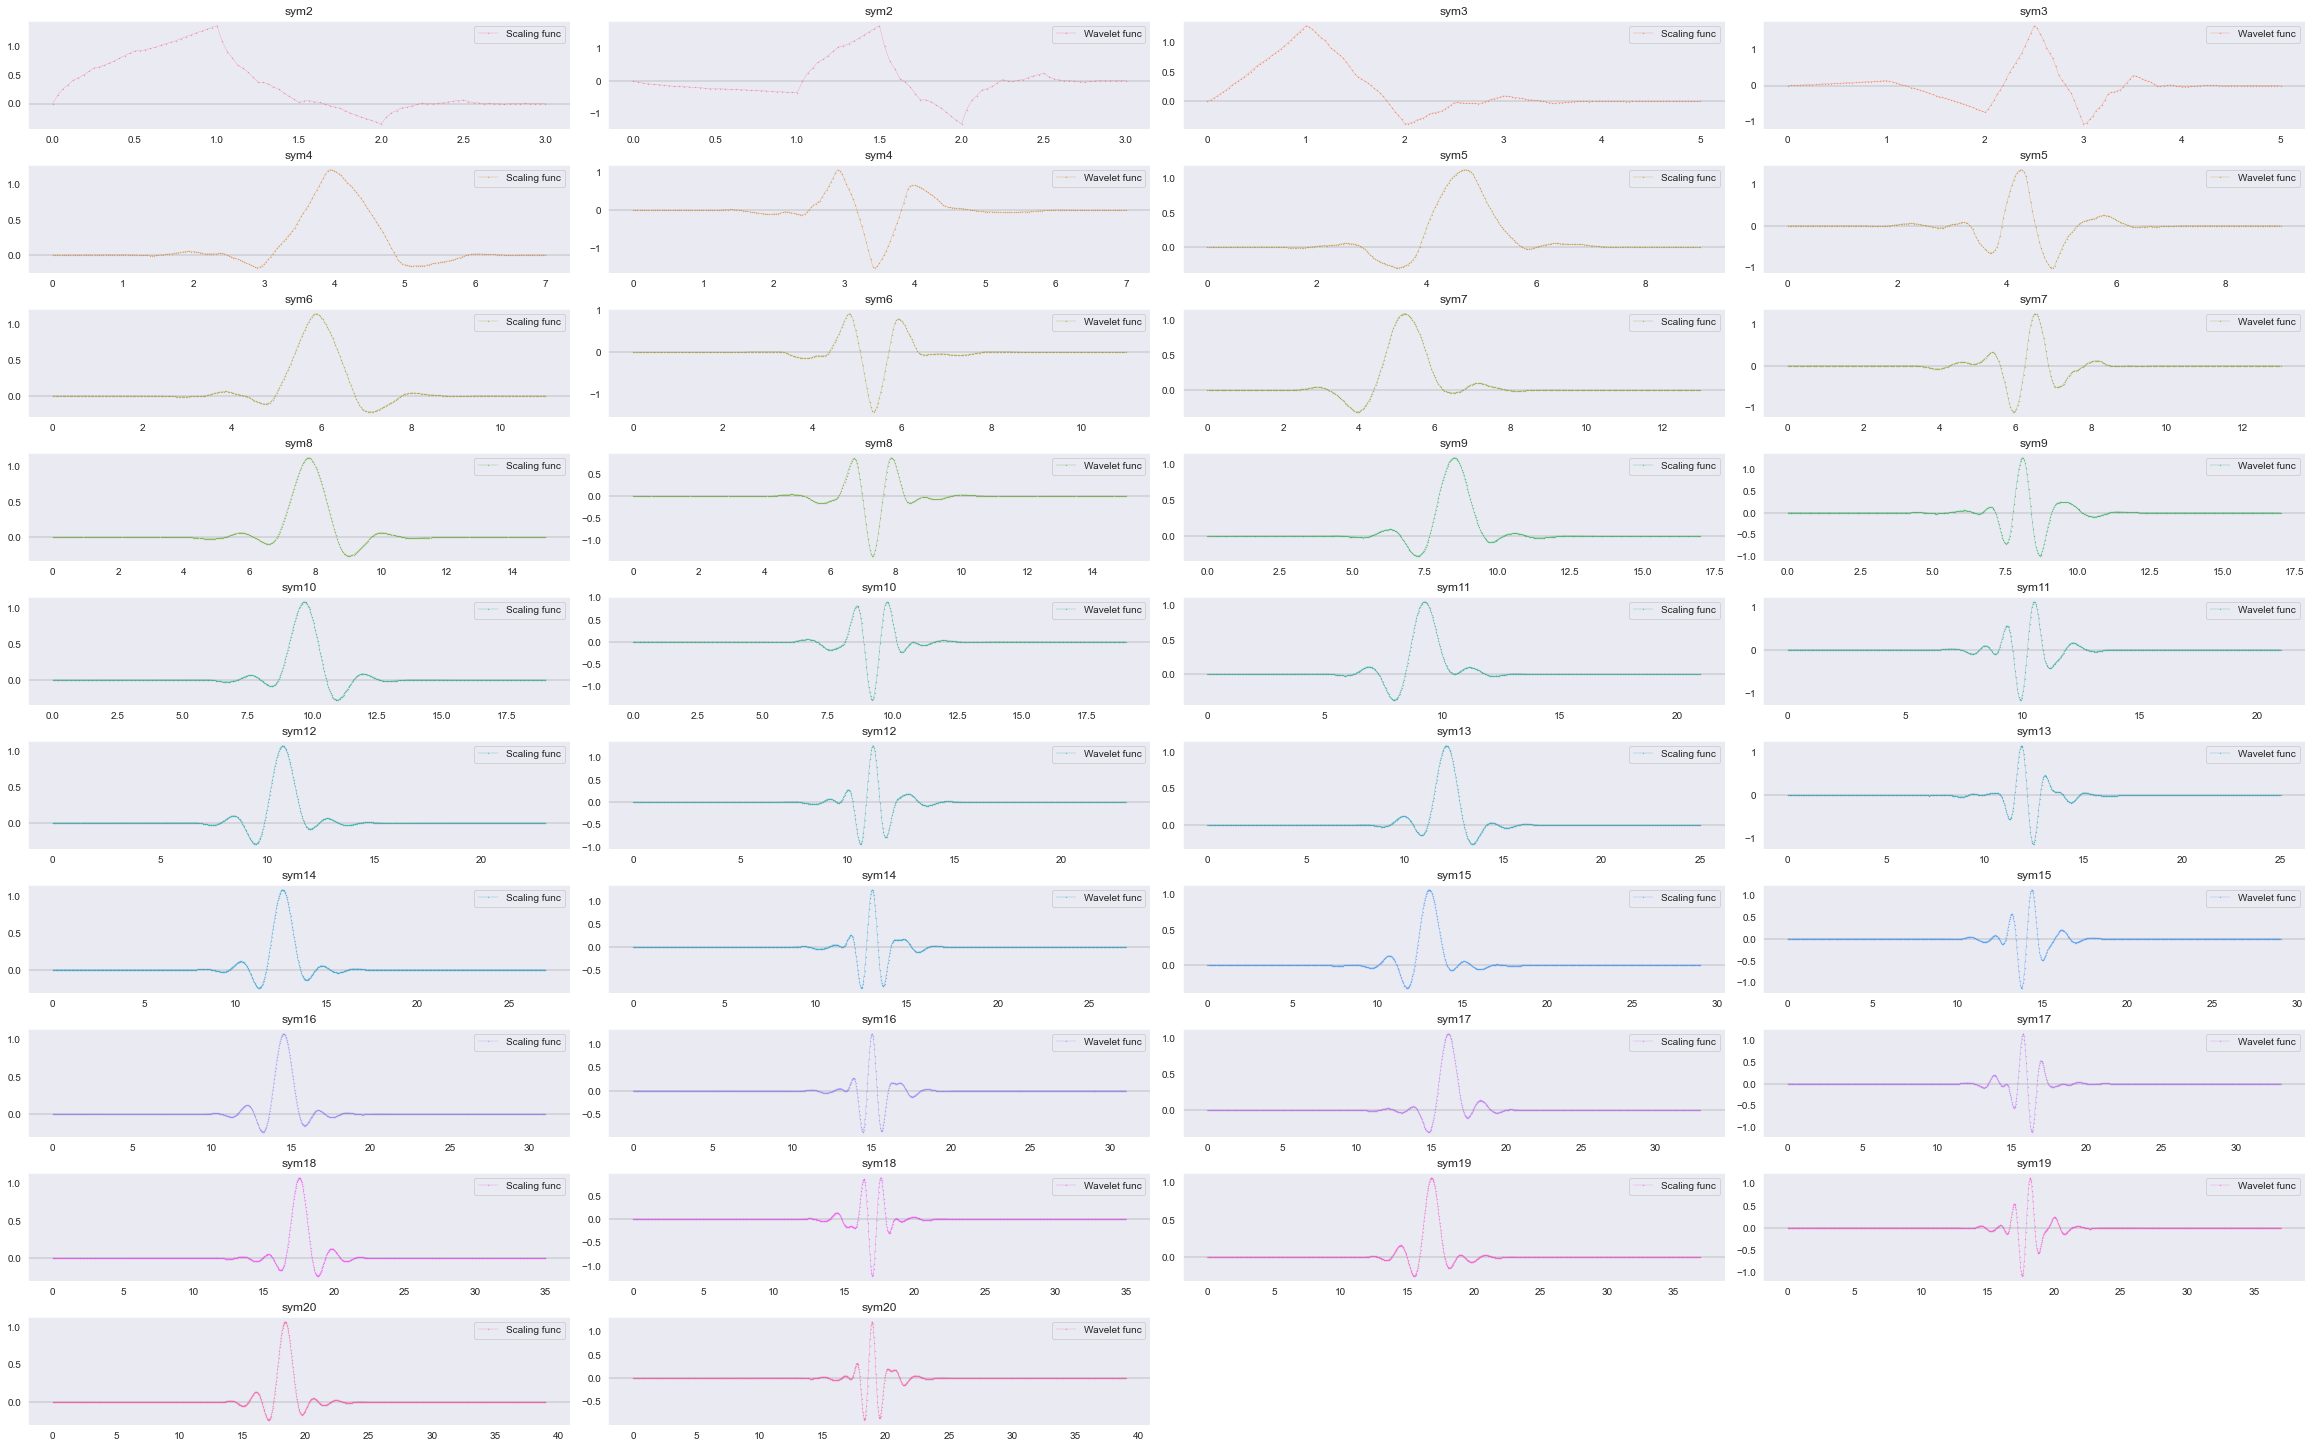

ic| f: 'coif'


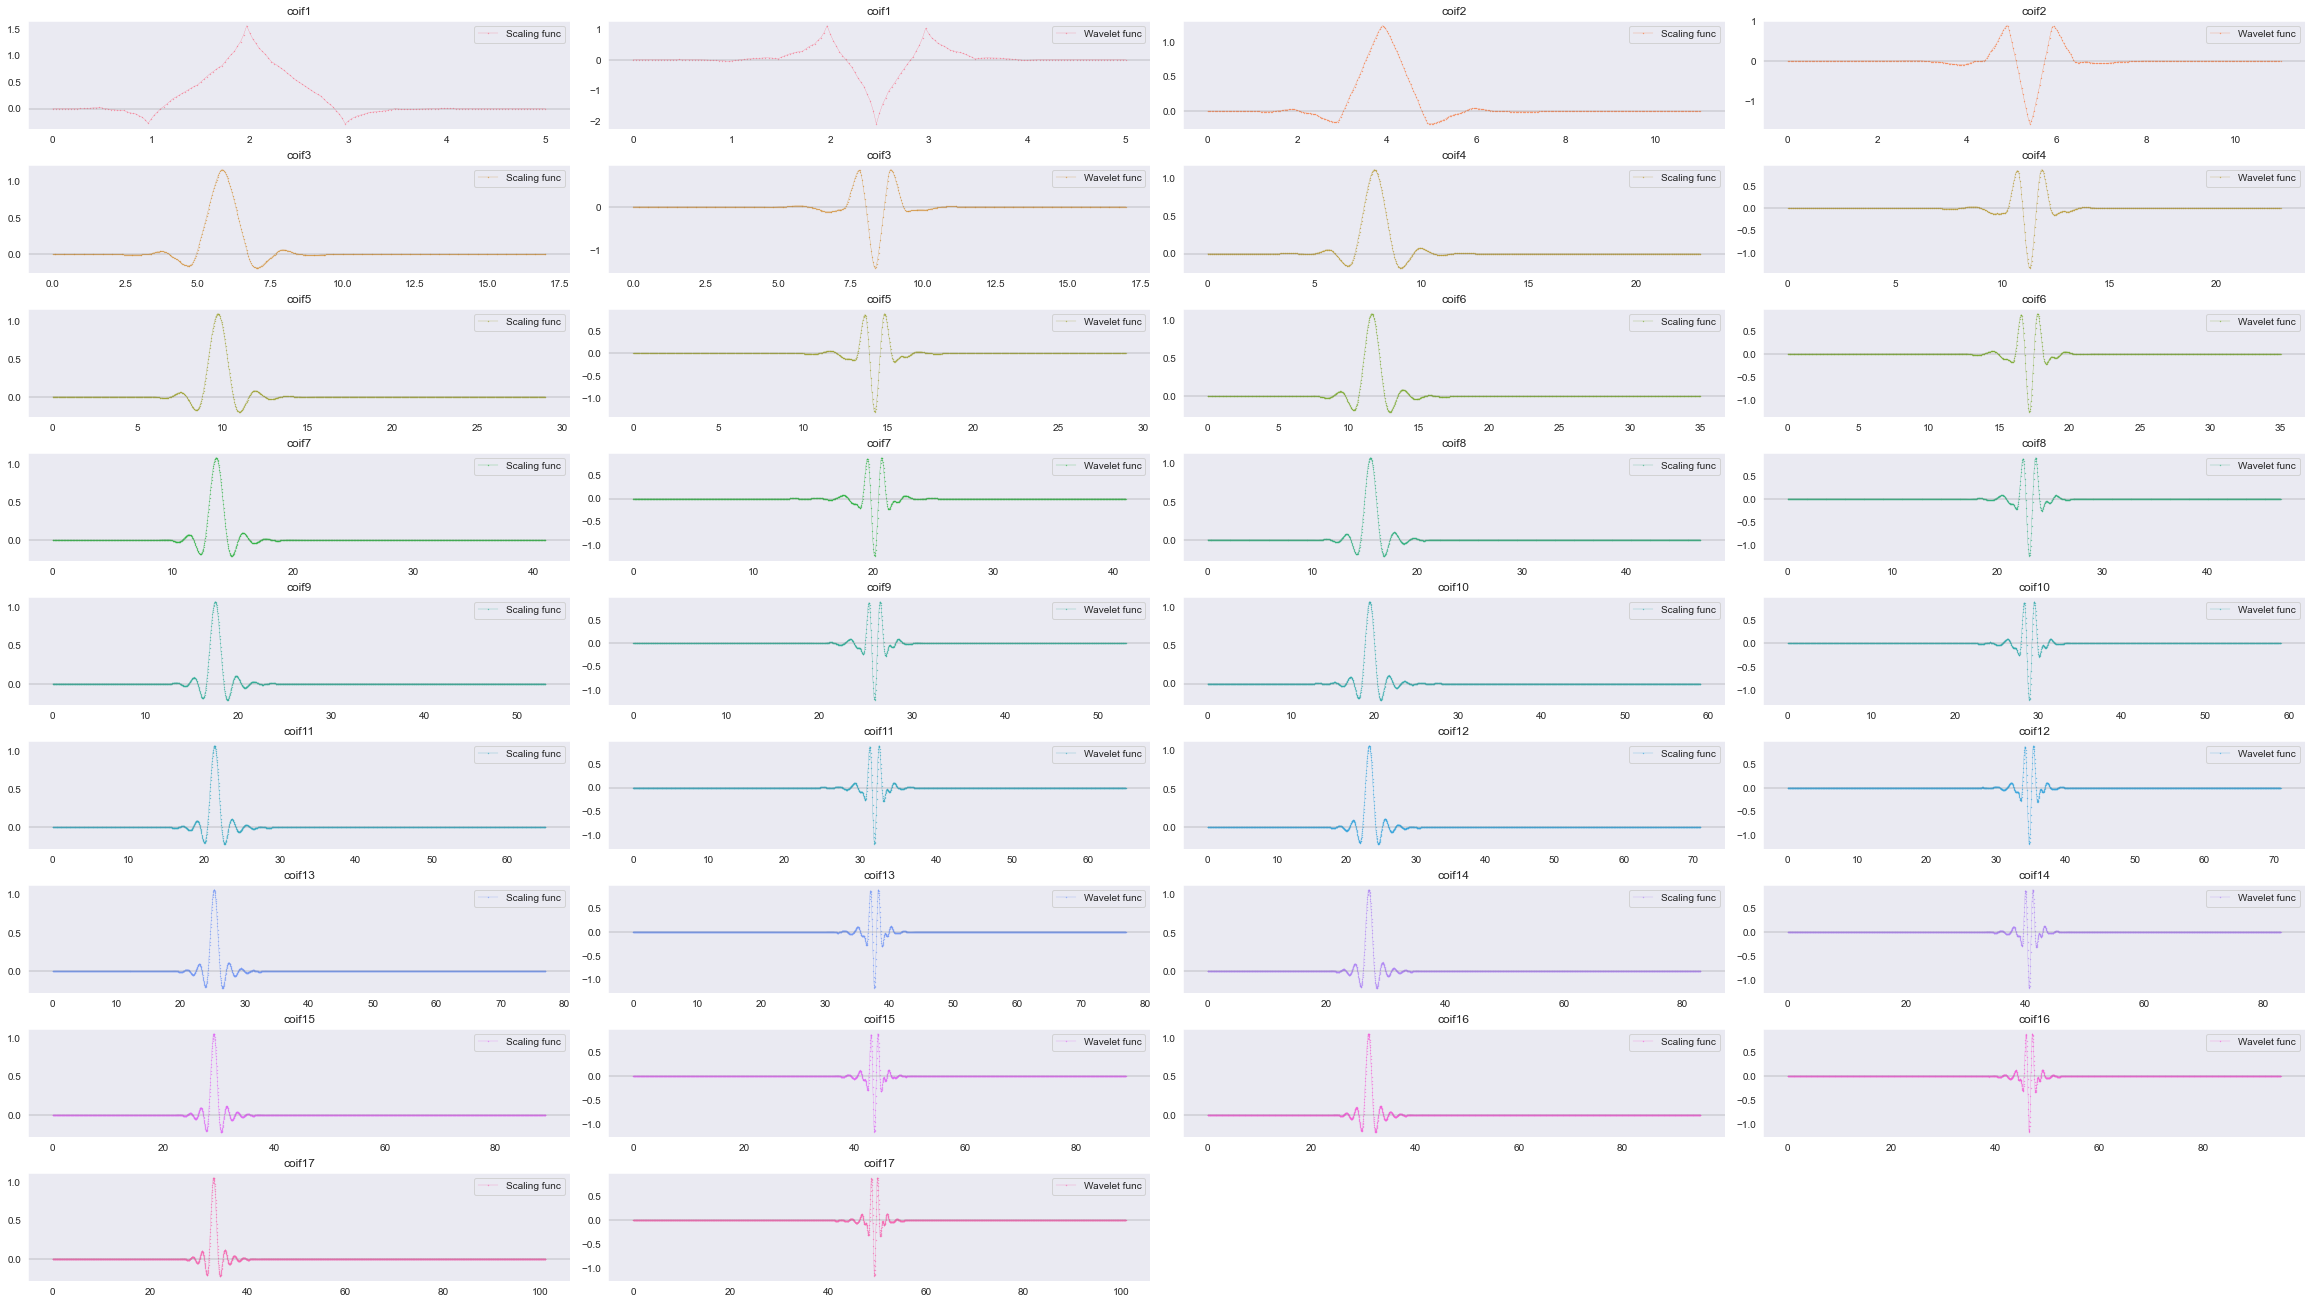

ic| f: 'bior'


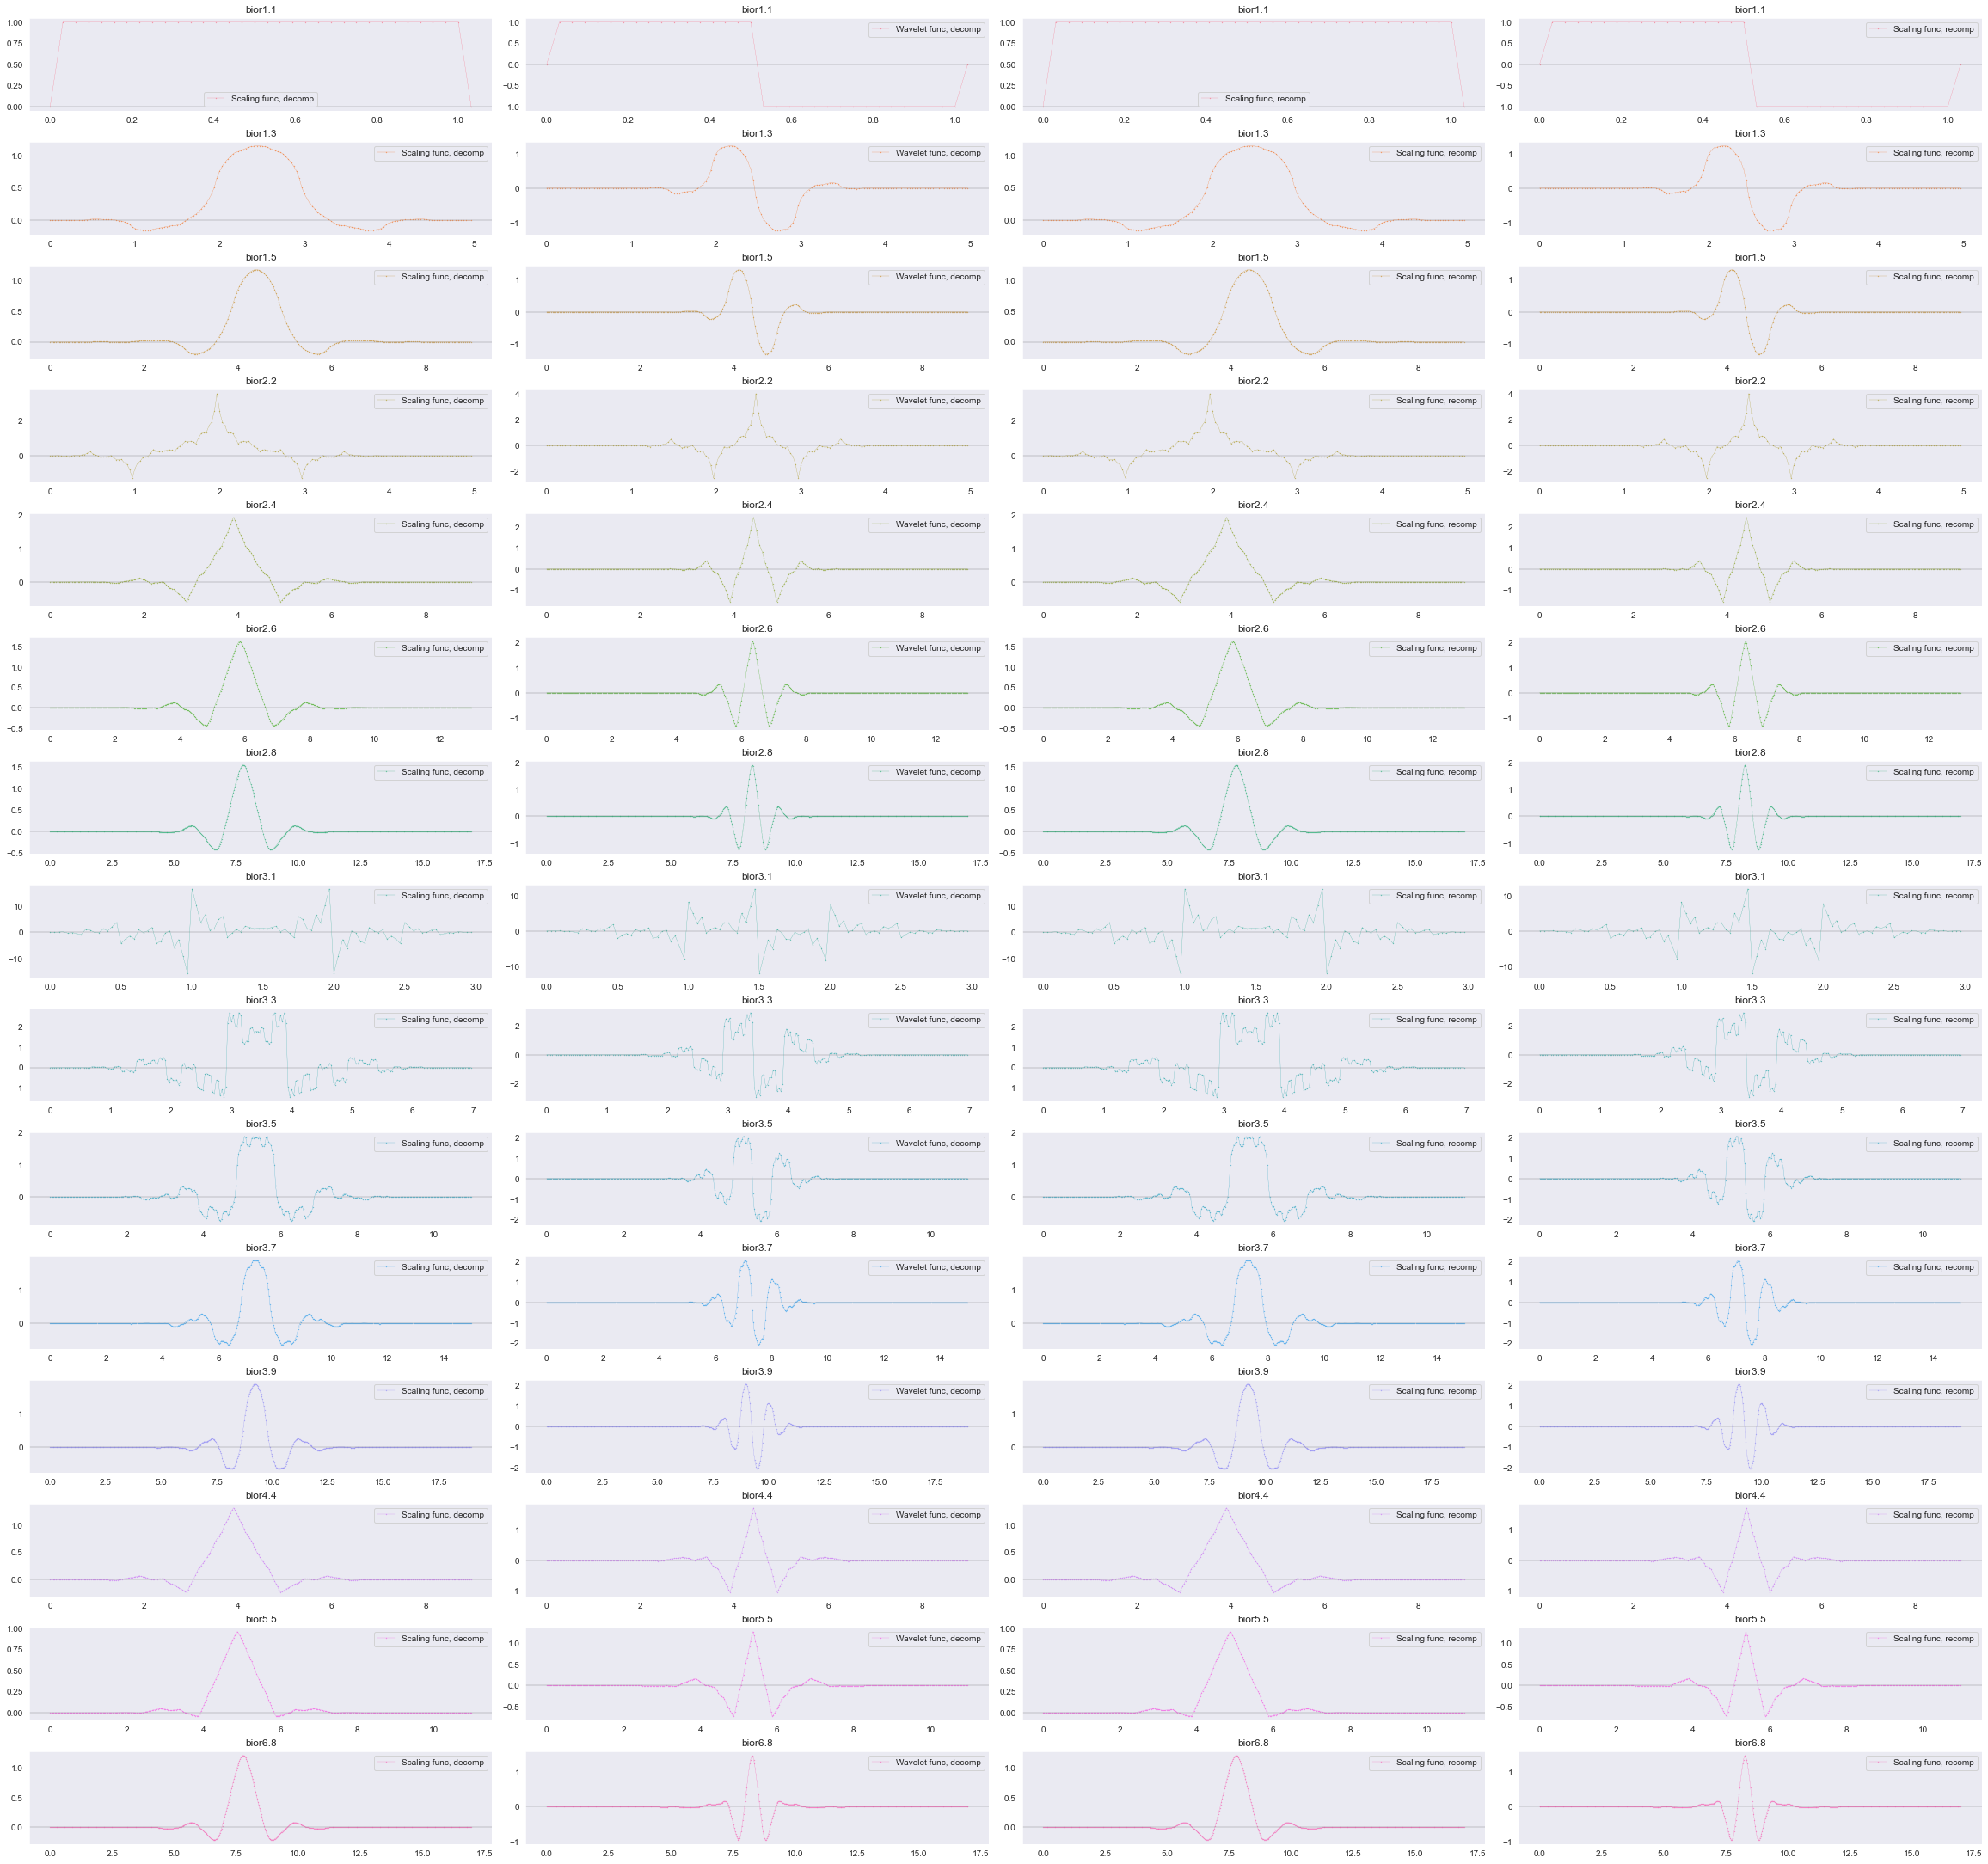

ic| f: 'rbio'


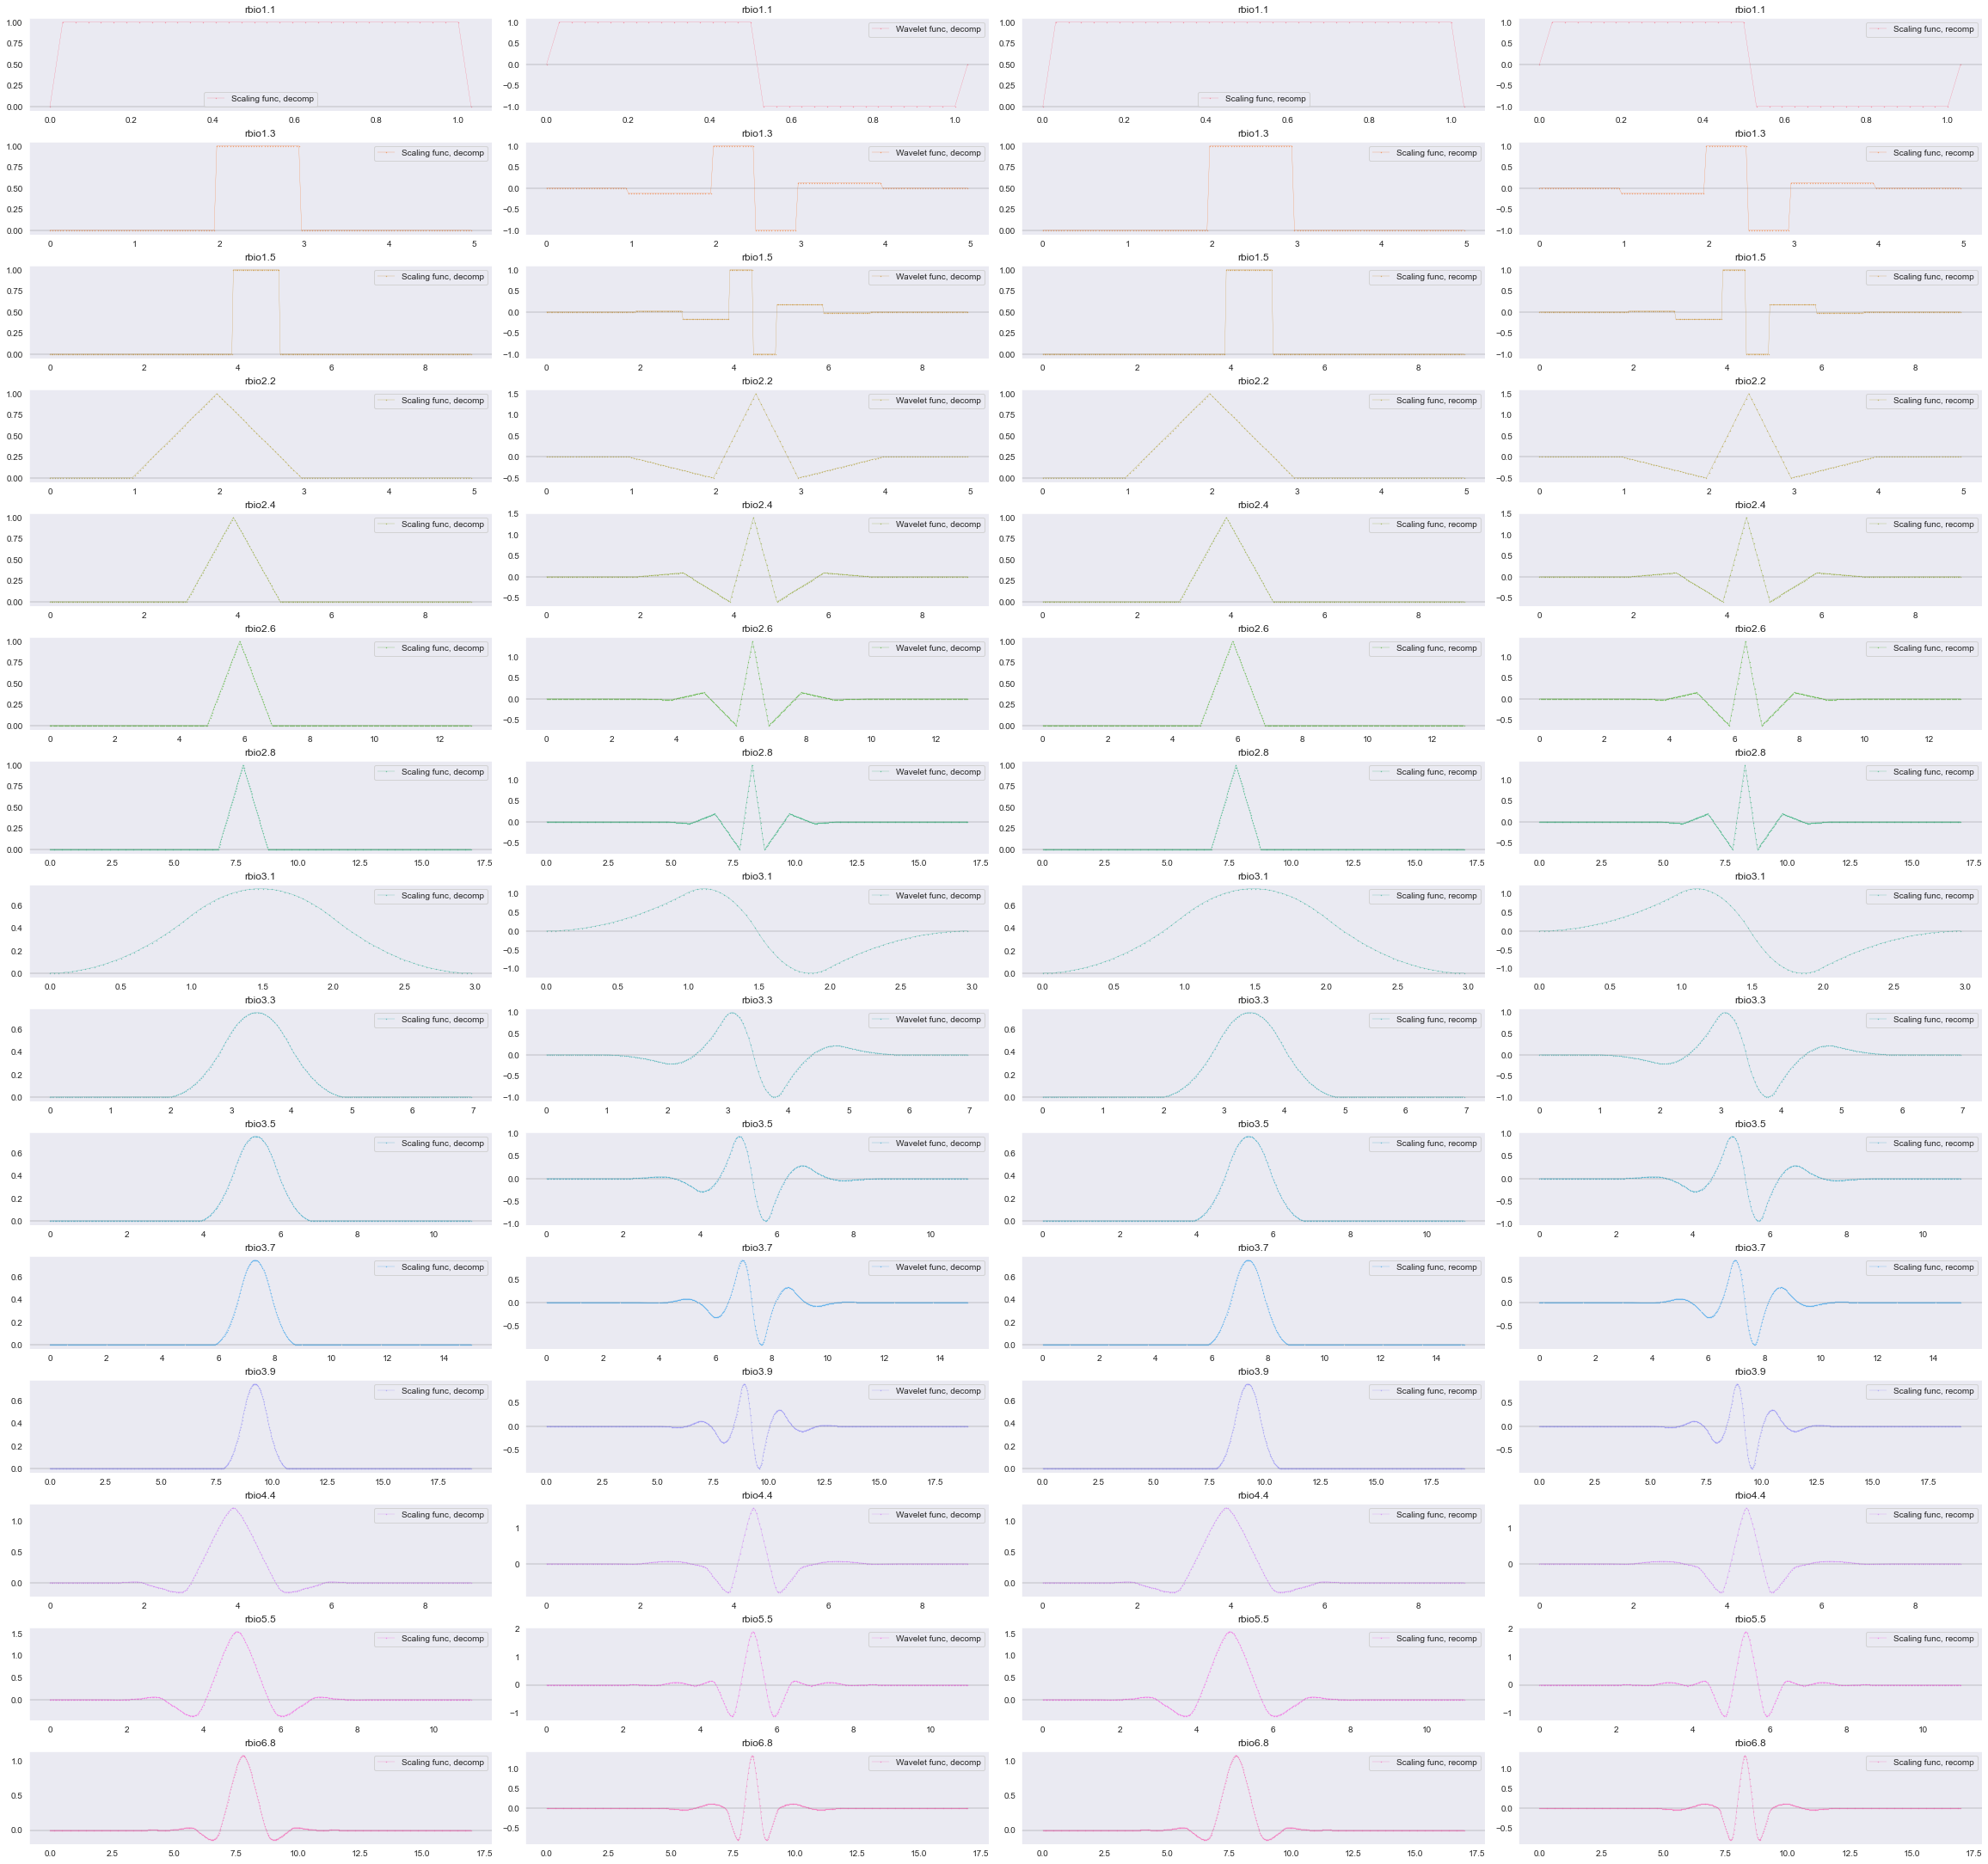

ic| f: 'dmey'


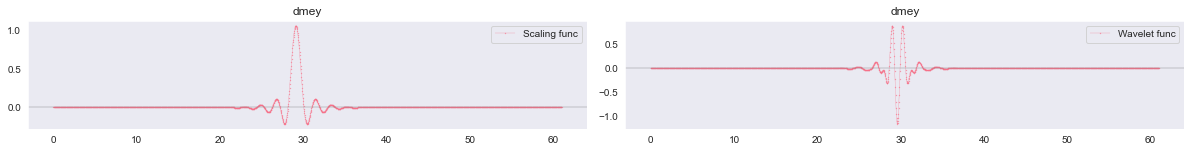

ic| f: 'gaus'


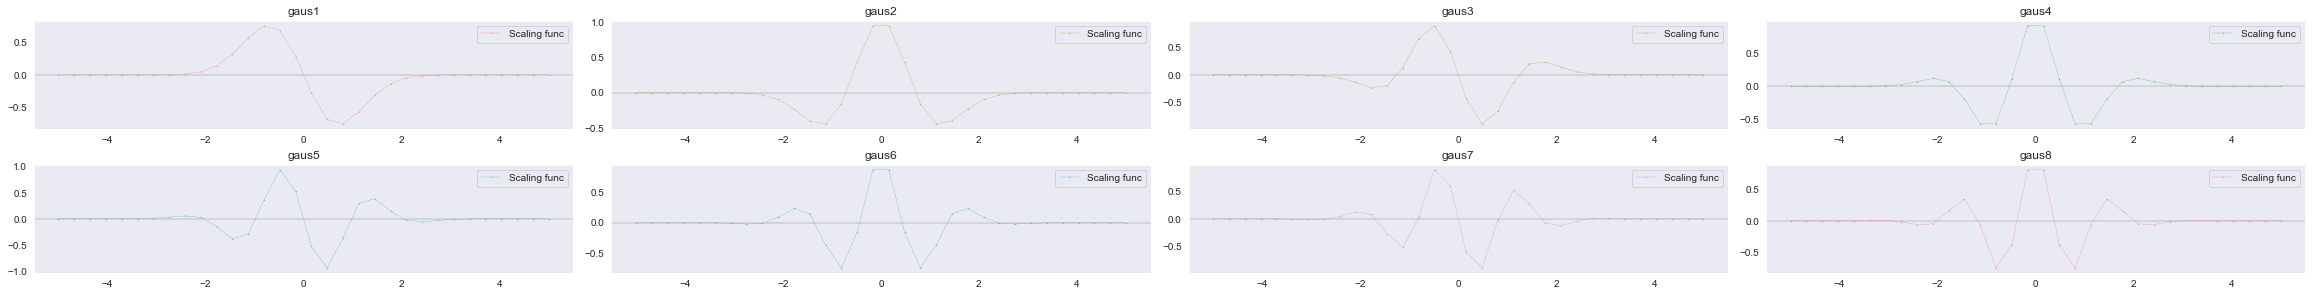

ic| f: 'mexh'


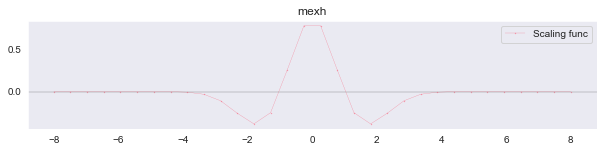

ic| f: 'morl'


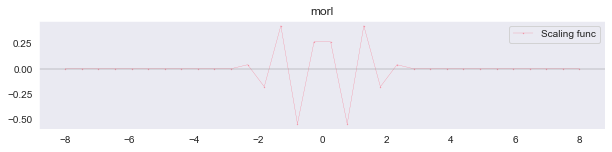

ic| f: 'cgau'


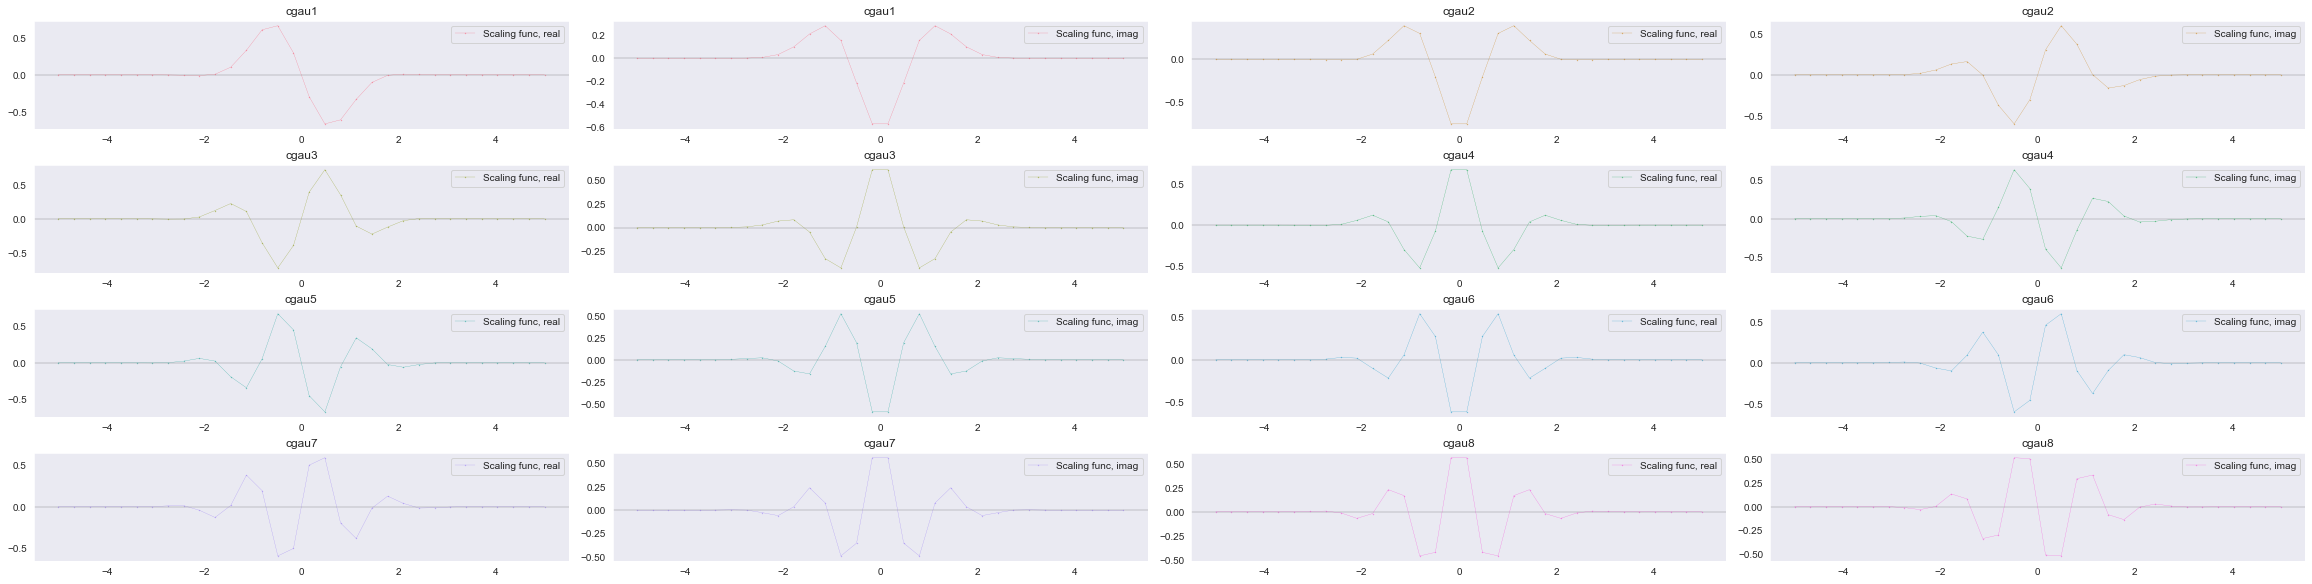

/Users/stefanh/Documents/UMich/Research/ECG-Classify/ECG-PVC-Classifier/explore-lib/util.py:73: FutureWarning: Wavelets from the family shan, without parameters specified in the name are deprecated. The name should takethe form shanB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: shan1.5-1.0).
  w_dummy = Obj(wnames[0])
ic| f: 'shan'
/Users/stefanh/Documents/UMich/Research/ECG-Classify/ECG-PVC-Classifier/explore-lib/util.py:95: FutureWarning: Wavelets from the family shan, without parameters specified in the name are deprecated. The name should takethe form shanB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: shan1.5-1.0).
  w = Obj(next(wnames))


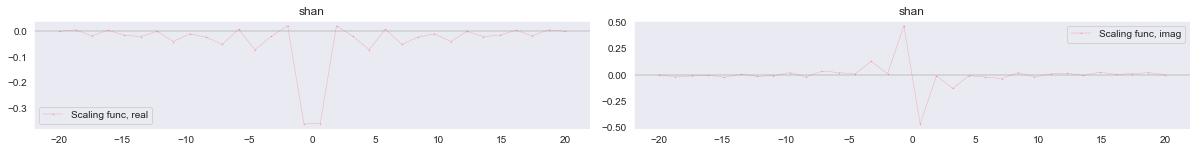

/Users/stefanh/Documents/UMich/Research/ECG-Classify/ECG-PVC-Classifier/explore-lib/util.py:73: FutureWarning: Wavelets of family fbsp, without parameters specified in the name are deprecated.  The name should take the form fbspM-B-C where M is the spline order and B, C are floats representing the bandwidth frequency and center frequency, respectively (example: fbsp1-1.5-1.0).
  w_dummy = Obj(wnames[0])
ic| f: 'fbsp'
/Users/stefanh/Documents/UMich/Research/ECG-Classify/ECG-PVC-Classifier/explore-lib/util.py:95: FutureWarning: Wavelets of family fbsp, without parameters specified in the name are deprecated.  The name should take the form fbspM-B-C where M is the spline order and B, C are floats representing the bandwidth frequency and center frequency, respectively (example: fbsp1-1.5-1.0).
  w = Obj(next(wnames))


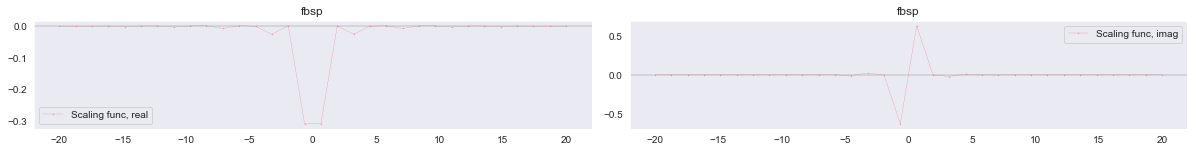

/Users/stefanh/Documents/UMich/Research/ECG-Classify/ECG-PVC-Classifier/explore-lib/util.py:73: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  w_dummy = Obj(wnames[0])
ic| f: 'cmor'
/Users/stefanh/Documents/UMich/Research/ECG-Classify/ECG-PVC-Classifier/explore-lib/util.py:95: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  w = Obj(next(wnames))


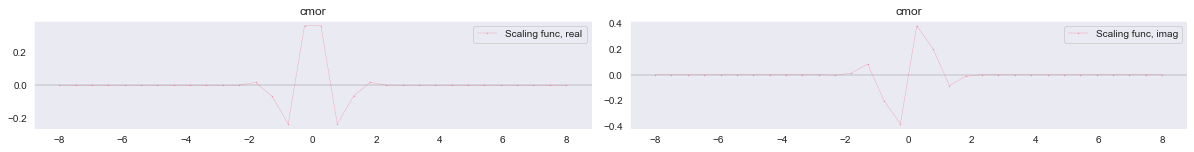

In [4]:
for f in pywt.families():
    plot_all_wavelets(f)